In [9]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [10]:
df_registered = pd.read_csv('registrado.csv')
df_registered.set_index('Registrado (mil ton.)', inplace=True)
df_registered = df_registered.T
df_registered

Registrado (mil ton.),Acre,Alagoas,Amapá,Amazonas,Bahia,Ceara,Distrito Federal,Espirito Santo,Goiás,Maranhão,...,Piauí,Rio Grande do Sul,Rio de Janeiro,Rio Grande do Norte,Rondônia,Roraima,Santa Catarina,São Paulo,Sergipe,Tocantins
2019-01,11.188,32.388,9.691,42.731,291.428,151.601,48.990,111.377,178.918,70.660,...,57.142,226.547,232.609,46.081,32.559,9.908,252.700,860.232,36.567,31.615
2019-02,10.381,30.378,7.378,36.026,249.430,129.537,44.726,98.614,161.936,50.796,...,46.283,228.500,195.364,38.703,24.910,10.723,246.146,773.607,30.849,30.275
2019-03,8.080,30.641,6.970,34.609,241.612,105.236,44.491,94.022,173.792,47.834,...,43.390,223.896,205.690,36.037,28.713,10.625,255.873,790.146,31.021,29.568
2019-04,11.154,32.337,7.612,40.787,252.303,110.835,43.901,91.546,176.627,45.327,...,40.824,234.132,231.354,38.430,32.660,10.593,273.299,886.929,31.437,26.940
2019-05,12.508,36.405,8.442,39.823,281.912,127.925,55.019,95.674,207.991,54.032,...,55.063,207.586,236.711,44.471,31.635,10.681,270.918,941.600,31.533,35.910
2019-06,12.126,22.499,8.835,39.957,200.213,127.138,50.942,88.927,185.784,60.657,...,56.474,228.583,215.360,37.884,35.142,7.887,256.605,817.301,26.431,33.954
2019-07,14.496,27.961,11.251,52.048,270.511,157.128,63.992,105.688,234.176,67.250,...,68.133,234.565,258.015,51.585,36.419,9.751,303.526,957.289,25.978,37.983
2019-08,16.723,32.378,11.342,53.567,281.466,164.440,64.127,104.711,226.996,70.773,...,68.642,249.519,244.870,54.306,40.300,9.654,299.284,978.990,29.860,40.046
2019-09,15.253,32.582,13.110,46.239,285.535,140.298,60.822,97.530,218.141,67.010,...,64.741,230.086,225.410,52.511,35.493,9.422,284.550,906.956,39.045,32.647
2019-10,16.531,42.703,13.195,51.066,328.259,168.407,65.182,99.651,234.939,81.128,...,71.269,233.136,252.849,59.472,38.489,11.160,307.576,980.948,45.213,39.065


In [11]:
df_previsto = pd.read_csv('previsto.csv')
df_previsto.set_index('Previsto (mil ton.)', inplace=True)
df_previsto = df_previsto.T
df_previsto

Previsto (mil ton.),Acre,Alagoas,Amapá,Amazonas,Bahia,Ceara,Distrito Federal,Espirito Santo,Goiás,Maranhão,...,Piauí,Rio Grande do Sul,Rio de Janeiro,Rio Grande do Norte,Rondônia,Roraima,Santa Catarina,São Paulo,Sergipe,Tocantins
2019-01,10.118375,27.747694,8.436264,37.303886,269.740631,169.559647,39.625950,91.016502,174.621429,68.772499,...,56.282806,218.143417,216.666885,41.616062,33.309322,7.079812,233.907364,853.587524,28.553705,35.877647
2019-02,9.658679,28.114614,7.736019,36.898685,241.449280,137.138962,40.128235,93.033264,162.510406,52.099632,...,54.009205,214.366699,211.948929,41.381828,33.662697,7.040736,235.158676,853.587524,29.052780,35.383850
2019-03,9.053057,28.540554,8.982416,36.776398,251.021301,136.655655,41.371742,97.793365,182.892700,56.913223,...,60.434551,246.752838,231.949951,45.202629,33.562832,7.235604,250.171005,853.587524,28.677353,35.527779
2019-04,10.388274,28.509520,8.773286,36.671162,247.296539,135.238220,41.615955,102.790787,211.889389,57.513985,...,67.110916,215.082809,240.909851,44.004303,35.384098,7.516031,246.732773,853.587524,29.573292,34.788864
2019-05,11.469811,27.262812,9.972883,36.219051,238.238480,140.300888,41.798187,101.979111,199.426346,63.019135,...,71.122459,242.764771,248.894821,42.731750,36.968376,7.320034,239.283951,853.587524,27.445395,38.711105
2019-06,11.690504,27.107010,11.663036,36.074989,243.811371,141.326721,40.613266,102.134438,191.795746,78.151672,...,73.396576,236.129425,232.057449,41.984581,37.090023,7.068558,236.783081,853.587524,26.191811,41.640945
2019-07,11.815616,26.997795,12.578382,35.871838,254.775406,142.030777,46.591301,108.906982,211.009949,90.146362,...,76.794785,238.027527,212.723358,43.193230,38.232121,7.811537,251.060043,853.587524,29.461323,45.788765
2019-08,12.058284,27.817234,12.327829,35.700420,264.657471,140.662140,50.655861,113.897141,211.752090,96.036942,...,80.939583,251.260345,218.156448,46.674980,38.120060,8.174174,243.260330,853.587524,28.753109,46.766319
2019-09,12.501531,33.168266,12.714603,36.547932,252.257034,148.000092,49.511742,114.135025,204.044006,94.633995,...,78.313728,220.111572,222.636444,42.459991,42.395473,8.787634,246.443497,853.587524,29.023178,52.064583
2019-10,12.410300,32.064770,16.309740,36.367680,266.371521,137.288239,53.157860,113.954582,207.899216,93.617752,...,77.778549,221.132019,221.332184,42.844818,41.117664,9.484248,240.654205,853.587524,30.547091,54.445404


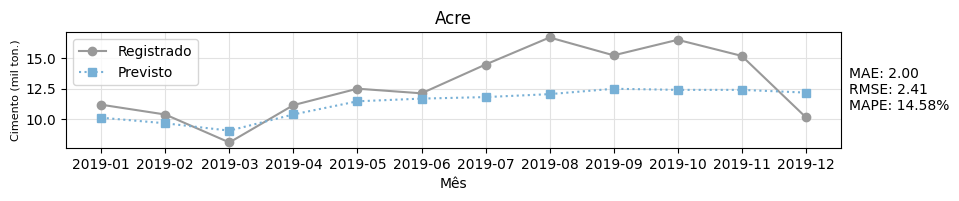

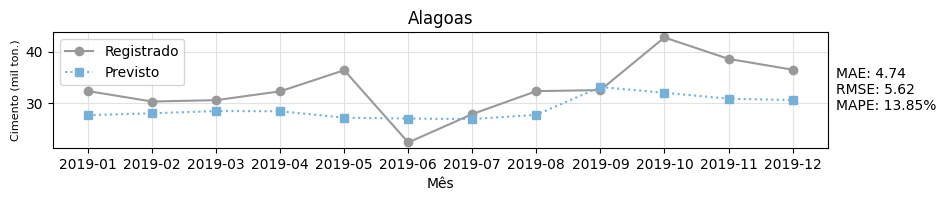

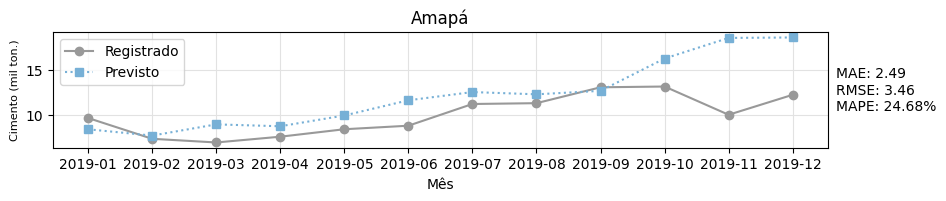

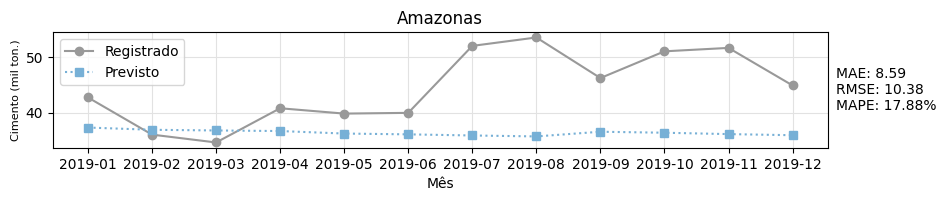

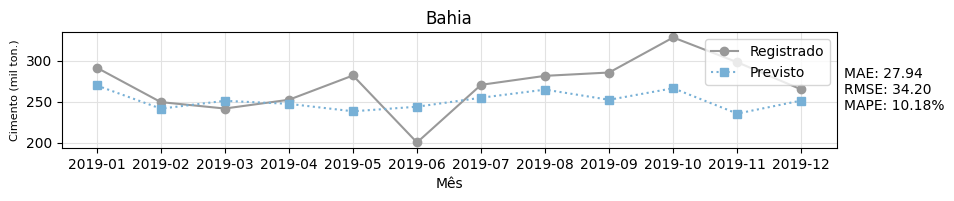

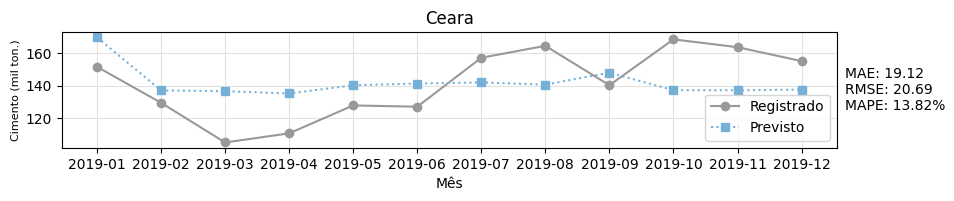

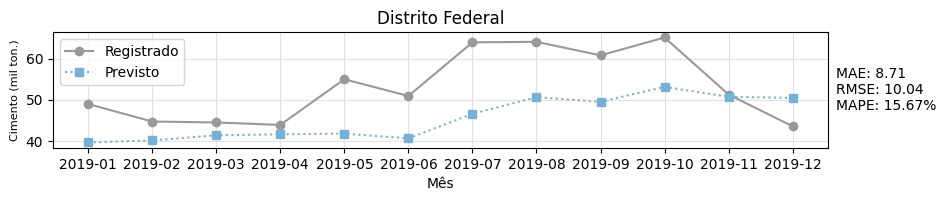

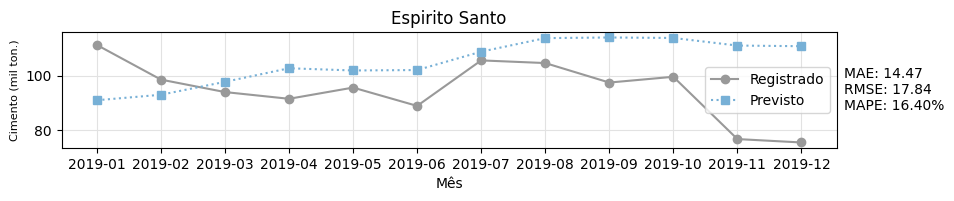

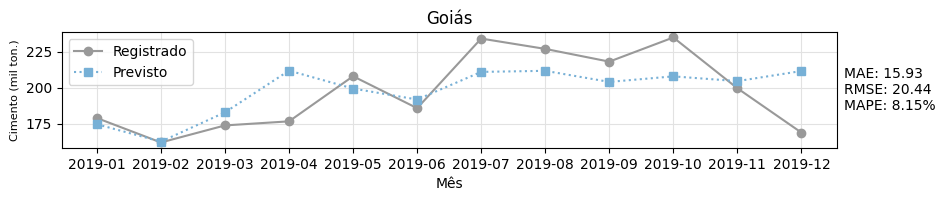

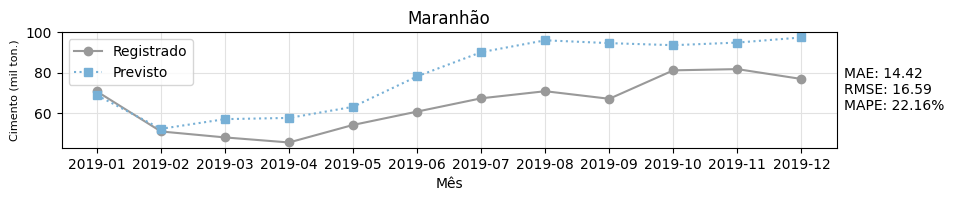

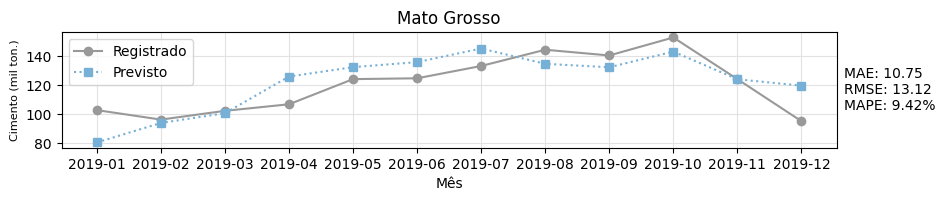

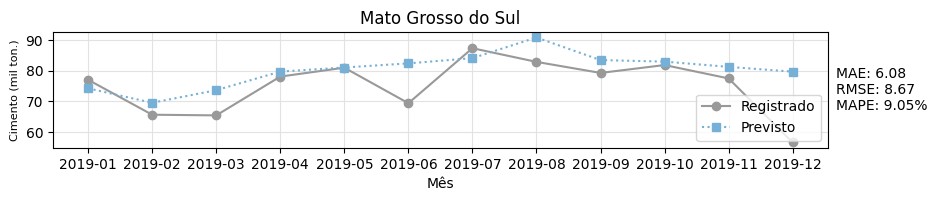

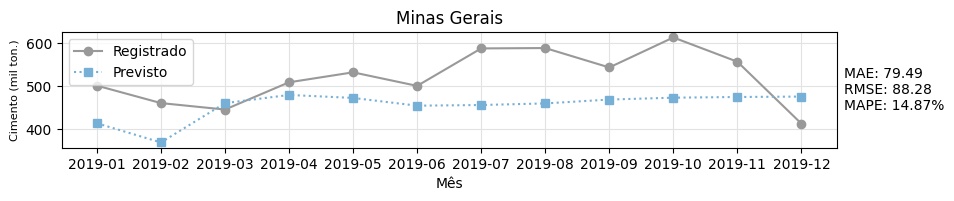

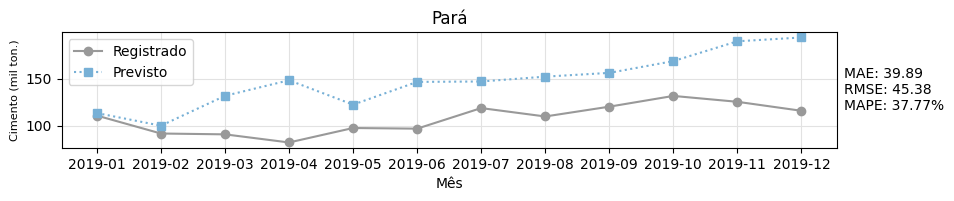

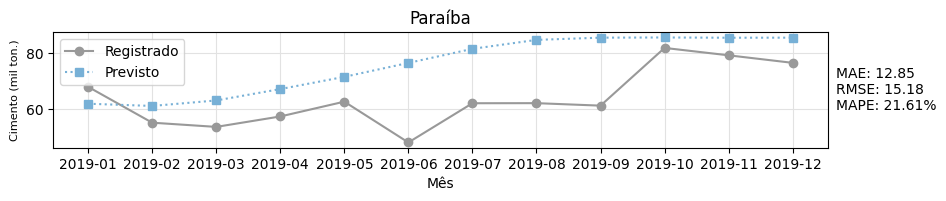

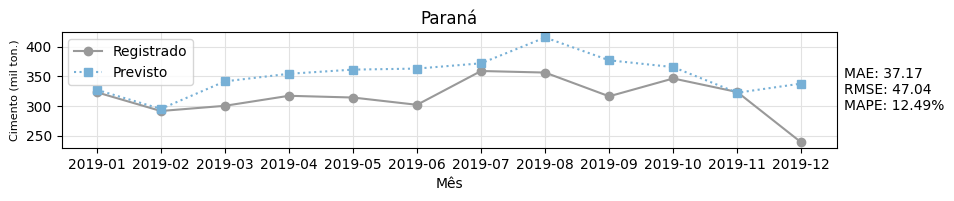

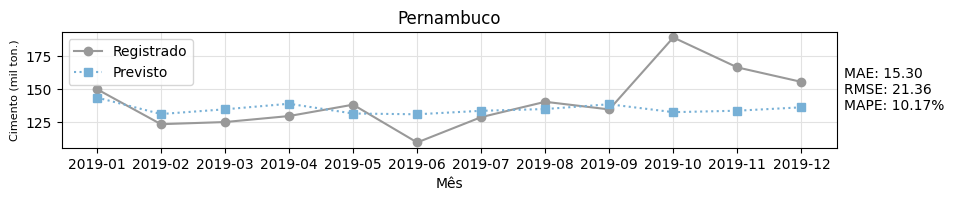

In [ ]:
def plot_time_series(df_registered, df_previsto):
    states = df_registered.columns  

    for state in states:
        plt.figure(figsize=(10, 1.5))
        plt.plot(df_registered.index, df_registered[state], 
                 label='Registrado', marker='o', color='#999999') 
        plt.plot(df_previsto.index, df_previsto[state], 
                 label='Previsto', marker='s', linestyle='dotted', color='#77B0D6') 

        actual = df_registered[state]
        predicted = df_previsto[state]

        mae = mean_absolute_error(actual, predicted)
        rmse = mean_squared_error(actual, predicted, squared=False)
        mape = (100 / len(actual)) * sum(abs((actual - predicted) / actual))

        info_text = f'MAE: {mae:.2f}\nRMSE: {rmse:.2f}\nMAPE: {mape:.2f}%' 

        plt.text(1.01, 0.5, info_text, transform=plt.gca().transAxes, 
                 fontsize=10, verticalalignment='center')

        plt.xlabel('Mês', fontsize=10)  
        plt.ylabel('Cimento (mil ton.)', fontsize=8) 
        plt.title(f'{state}')
        plt.legend()
        plt.grid(True, color='#E2E2E2') 
        plt.show()


plot_time_series(df_registered, df_previsto)

In [13]:
def plot_error_distribution(df_registered, df_previsto):
    errors = ((df_registered - df_previsto) / df_registered) * 100
    all_errors = errors.values.flatten()
    ranges = [float('-inf'), -50, -30, -10, 10, 30, 50, float('inf')]
    error_counts = pd.cut(all_errors, ranges).value_counts().sort_index()
    labels = ['< -50%', '-50% to -30%', '-30% to -10%', '-10% to 10%', '10% to 30%', '30% to 50%', '> 50%']

    plt.figure(figsize=(8, 6))
    bars = plt.barh(labels, error_counts, color='#77B0D6')
    plt.xlabel('Número de previsões')
    plt.ylabel('Intervalo de erros')
    plt.title('Distribuição agregada de erros')
    plt.gca().spines['top'].set_visible(False)  
    plt.gca().spines['right'].set_visible(False)

    for bar, count in zip(bars, error_counts):
        plt.text(bar.get_width(), bar.get_y() + bar.get_height() / 2, f"{(count / sum(error_counts)) * 100:.1f}%", 
                 va='center', ha='left', fontsize=10, color='black')

    plt.show()

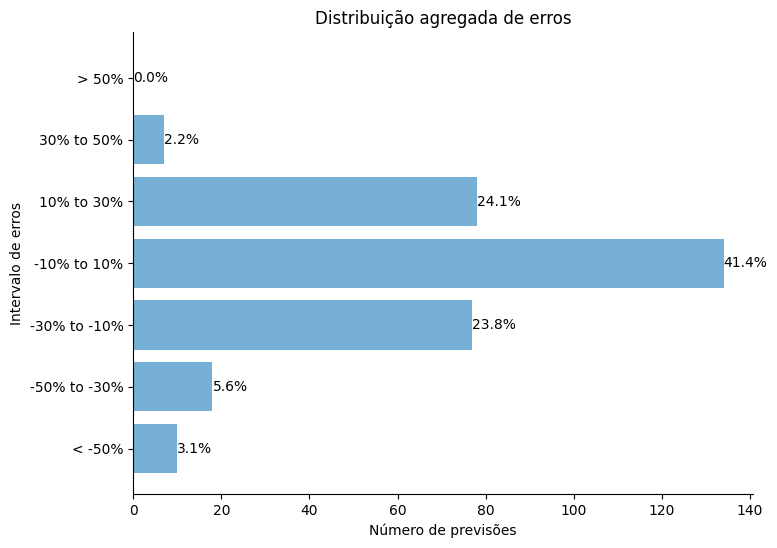

In [14]:
plot_error_distribution(df_registered, df_previsto)

In [15]:
def calculate_errors_summary(df_registered, df_previsto):
    errors = ((df_registered - df_previsto) / df_registered) * 100
    
    rmse_values = []
    mae_values = []
    mape_values = []

    for column in df_registered.columns:
        actual = df_registered[column]
        predicted = df_previsto[column]

        rmse = mean_squared_error(actual, predicted, squared=False)
        mae = mean_absolute_error(actual, predicted)
        mape = (100 / len(actual)) * sum(abs((actual - predicted) / actual))

        rmse_values.append(round(rmse,2))
        mae_values.append(round(mae,2))
        mape_values.append(round(mape,2))

    summary = {
        'RMSE': rmse_values,
        'MAE': mae_values,
        'MAPE': mape_values
    }

    summary_df = pd.DataFrame(summary, index=df_registered.columns)
    mean_row = {
        'RMSE': round(sum(rmse_values) / len(rmse_values), 2),
        'MAE': round(sum(mae_values) / len(mae_values), 2),
        'MAPE': round(sum(mape_values) / len(mape_values), 2)
    }
    summary_df.loc['Mean'] = mean_row  

    return summary_df

In [16]:
sumario_erro = calculate_errors_summary(df_registered, df_previsto)
sumario_erro

,RMSE,MAE,MAPE
Registrado (mil ton.),,,
Acre,2.41,2.00,14.58
Alagoas,5.62,4.74,13.85
Amapá,3.46,2.49,24.68
Amazonas,10.38,8.59,17.88
Bahia,34.20,27.94,10.18
Ceara,20.69,19.12,13.82
Distrito Federal,10.04,8.71,15.67
Espirito Santo,17.84,14.47,16.40
Goiás,20.44,15.93,8.15
